<a href="https://colab.research.google.com/github/tim530712345/20210623_DeepLearning/blob/main/cifar10_GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
# 50000: 一維的串列， (50000, 1): 二維表格
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names= [
    'airplan',										
    'automobile',										
    'bird',									
    'cat',									
    'deer',									
    'dog',								
    'frog',								
    'horse',								
    'ship',								
    'truck'
]

ship


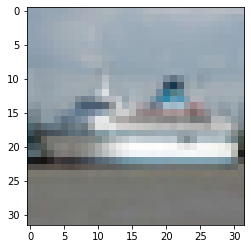

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D # 圖片
from tensorflow.keras.layers import Dense, Flatten, Dropout # Flatten 攤平
layers = [
          # 每個卷積核都是一個梯度下降的結果
          # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
          Conv2D(64, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
          MaxPool2D(),
          # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
          Conv2D(128, 3, activation='relu', padding='same'),
          MaxPool2D(),
          # 3 * 3 * 128(一個) * 256 + 256(bias) = 295168
          Conv2D(256, 3, activation='relu', padding='same'),
          MaxPool2D(),
          Conv2D(512, 3, activation='relu', padding='same'),
          MaxPool2D(),
          GlobalAveragePooling2D(),
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [6]:
# sparse 版本的 categoricalcrossentropy: 可免除one-hot encoding 的處理
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [7]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 36s - loss: 1.6807 - accuracy: 0.3802 - val_loss: 1.3783 - val_accuracy: 0.4966
Epoch 2/100
225/225 - 4s - loss: 1.2256 - accuracy: 0.5625 - val_loss: 1.0954 - val_accuracy: 0.6098
Epoch 3/100
225/225 - 4s - loss: 1.0214 - accuracy: 0.6376 - val_loss: 0.9463 - val_accuracy: 0.6672
Epoch 4/100
225/225 - 4s - loss: 0.8796 - accuracy: 0.6922 - val_loss: 0.8219 - val_accuracy: 0.7150
Epoch 5/100
225/225 - 4s - loss: 0.7602 - accuracy: 0.7348 - val_loss: 0.7861 - val_accuracy: 0.7348
Epoch 6/100
225/225 - 4s - loss: 0.6855 - accuracy: 0.7623 - val_loss: 0.7416 - val_accuracy: 0.7528
Epoch 7/100
225/225 - 4s - loss: 0.6111 - accuracy: 0.7883 - val_loss: 0.7174 - val_accuracy: 0.7554
Epoch 8/100
225/225 - 4s - loss: 0.5444 - accuracy: 0.8092 - val_loss: 0.6736 - val_accuracy: 0.7682
Epoch 9/100
225/225 - 4s - loss: 0.4827 - accuracy: 0.8323 - val_loss: 0.6520 - val_accuracy: 0.7842
Epoch 10/100
225/225 - 4s - loss: 0.4130 - accuracy: 0.8571 - val_loss: 0.6255 - val_accur

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.7736


[0.6896545886993408, 0.7735999822616577]

In [12]:
pre = model.predict_classes(x_test_norm)
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000, 1)
(10000,)
(10000,)


In [13]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(
    mat, 
    columns=["{}(預測)".format(names[i]) for i in range(10)],
    index=["{}(正確)".format(names[i]) for i in range(10)]
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplan(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplan(正確),810,32,11,10,6,7,9,10,53,52
automobile(正確),5,909,1,3,0,2,2,2,14,62
bird(正確),85,9,626,44,39,69,67,33,14,14
cat(正確),29,18,46,535,39,217,50,28,17,21
deer(正確),23,4,68,49,659,55,51,70,14,7
dog(正確),17,7,21,98,27,761,16,36,6,11
frog(正確),5,6,30,41,12,28,863,5,5,5
horse(正確),14,2,18,18,29,67,4,834,4,10
ship(正確),34,38,7,3,0,8,3,1,889,17
truck(正確),15,85,3,5,0,7,3,11,21,850


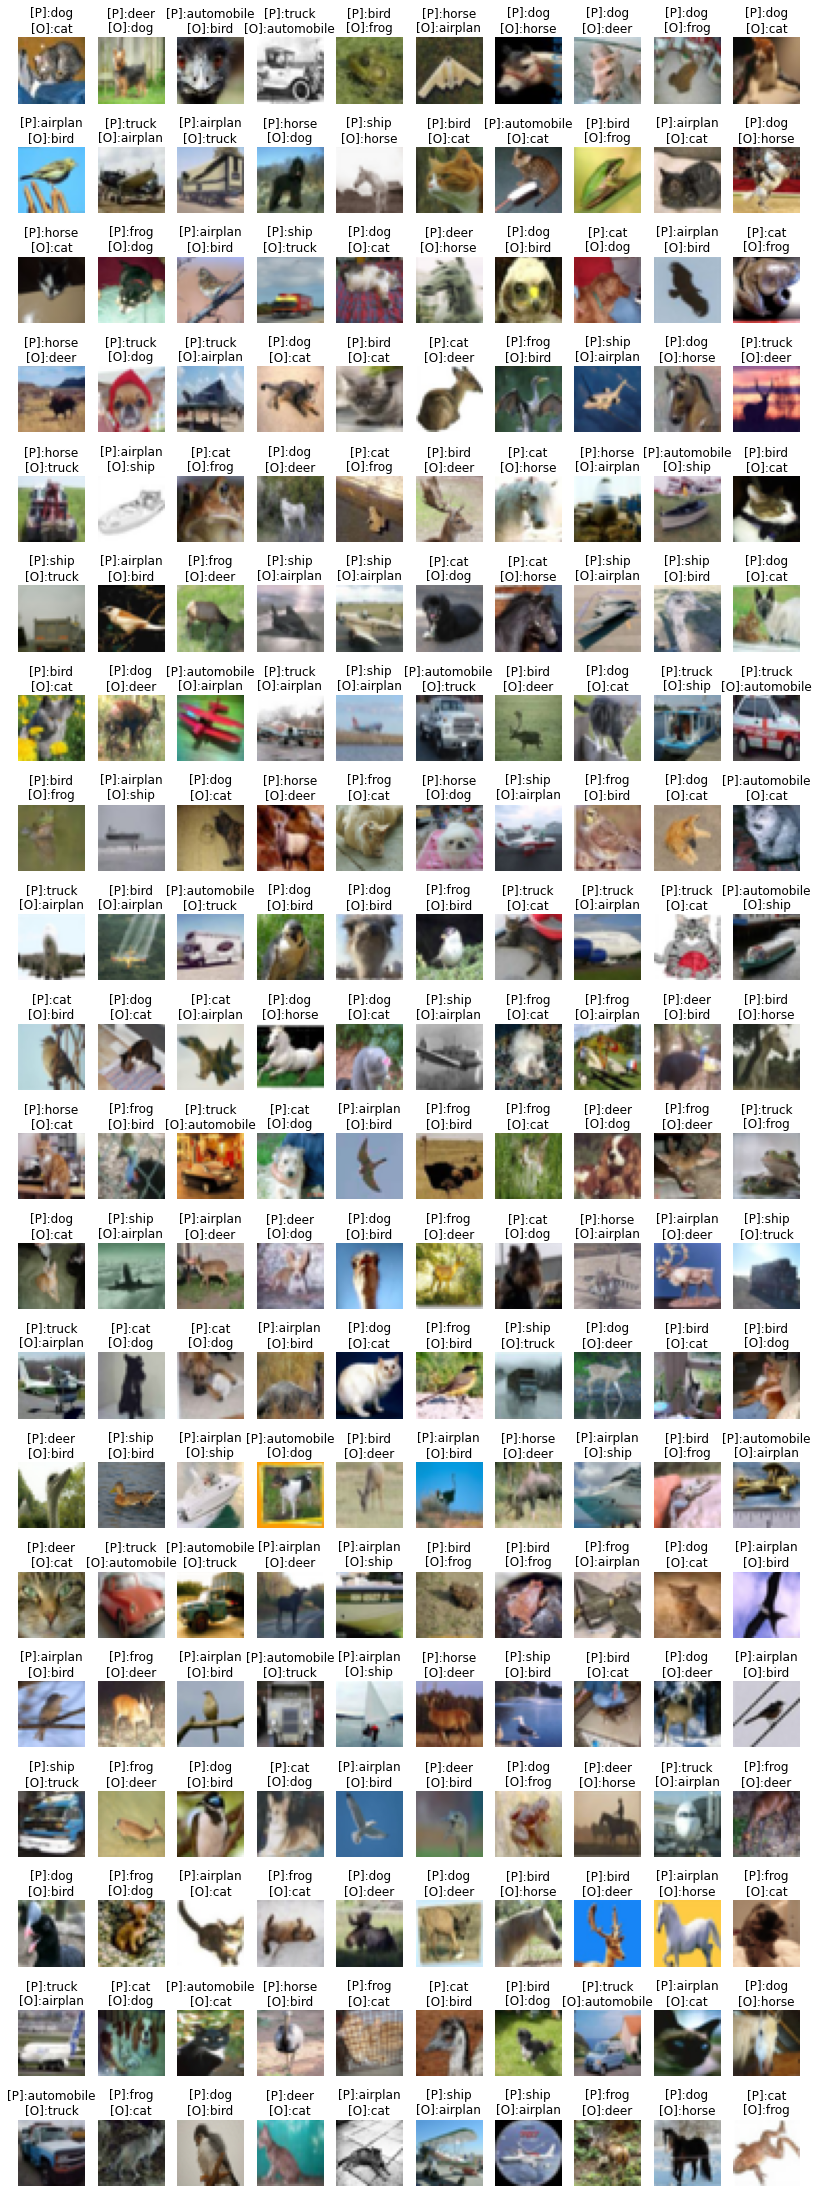

In [14]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
import requests
from PIL import Image
url = input('輸入網址:')
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert('RGB')
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(name, pre):
  print(n, '的機率', round(p, 3))
plt.inshow(img)